### Objectives
Perform a complete data analysis by...

Creating a Python data structure from a .csv file
Exploring and cleaning the data
Conducting descriptive analysis
Visualizing the results

### 1. Loading the csv

In [1]:
!ls

CSV.ipynb
Data Analysis with CSV Files(Flex).ipynb
Data Import Csv and JSon.ipynb
File Input and Output in Python.ipynb
Kings_County_Real_Estate_Sales.csv
List Comprehensions and Dictionary Comprehensions.ipynb
Python Data Manipulation(Flex).ipynb
apple_orchard.csv
cities.xls
colors_and_numbers.parquet
dog.jpg
food_prices.csv
index.ipynb
leia.json
leia.xml
olympic_medals.csv
plot.pkl
track_times.csv
twitter_graph.json
usa_2016_gold_medals.csv
zen_of_python.txt
zen_of_python_cleaned.txt


In [2]:
csv_file_path = './Kings_County_Real_Estate_Sales.csv'
import csv

#prints the first line of the csv file
with open(csv_file_path) as csvfile:
    #reader = list(csv.DictReader(f))
    print(csvfile.readline())

ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning



In [3]:
#prints the second line of the csv file
with open(csv_file_path) as csvfile:
    csvfile.readline()
    print(csvfile.readline())

2687551,138860,110,08/21/2014,245000,20140828001436,   ,   ,      , ,              ,       ,WENKLE NOEL SMITH -TRUSTEE                        ,ALEXANDER APRIL                                   ,3,6,3,N,N,N,N,1,8, 



In [4]:
#print lines in Bash- using the head command
!head -n 2 './Kings_County_Real_Estate_Sales.csv'

ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
2687551,138860,110,08/21/2014,245000,20140828001436,   ,   ,      , ,              ,       ,WENKLE NOEL SMITH -TRUSTEE                        ,ALEXANDER APRIL                                   ,3,6,3,N,N,N,N,1,8, 


### using the CSV Library

In [5]:
#print orderedDict from row of CSV file
with open(csv_file_path) as csvfile:
    reader=csv.DictReader(csvfile)
    print(next(reader))

{'ExciseTaxNbr': '2687551', 'Major': '138860', 'Minor': '110', 'DocumentDate': '08/21/2014', 'SalePrice': '245000', 'RecordingNbr': '20140828001436', 'Volume': '   ', 'Page': '   ', 'PlatNbr': '      ', 'PlatType': ' ', 'PlatLot': '              ', 'PlatBlock': '       ', 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ', 'BuyerName': 'ALEXANDER APRIL                                   ', 'PropertyType': '3', 'PrincipalUse': '6', 'SaleInstrument': '3', 'AFForestLand': 'N', 'AFCurrentUseLand': 'N', 'AFNonProfitUse': 'N', 'AFHistoricProperty': 'N', 'SaleReason': '1', 'PropertyClass': '8', 'SaleWarning': ' '}


### let's get all of the data out of our file and into dictionaries, and store those dictionaries in a new list called sales.

In [6]:
sales=[]
with open(csv_file_path) as csvfile:
    reader=csv.DictReader(csvfile)
    for row in reader:
            sales.append(row)

In [7]:
sales[0:3]

[{'ExciseTaxNbr': '2687551',
  'Major': '138860',
  'Minor': '110',
  'DocumentDate': '08/21/2014',
  'SalePrice': '245000',
  'RecordingNbr': '20140828001436',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
  'BuyerName': 'ALEXANDER APRIL                                   ',
  'PropertyType': '3',
  'PrincipalUse': '6',
  'SaleInstrument': '3',
  'AFForestLand': 'N',
  'AFCurrentUseLand': 'N',
  'AFNonProfitUse': 'N',
  'AFHistoricProperty': 'N',
  'SaleReason': '1',
  'PropertyClass': '8',
  'SaleWarning': ' '},
 {'ExciseTaxNbr': '3080093',
  'Major': '82204',
  'Minor': '9037',
  'DocumentDate': '10/27/2020',
  'SalePrice': '0',
  'RecordingNbr': '20201102000765',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'BALA RAJNI    

### 2.Data Preparation
Now that we've gotten all of our data into a Python object, we can prepare it for analysis. Let's look at a sample observation and consider how we might want to process it to make it easier to analyz

In [8]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' '}

### 2a.Clean the Sale Prices
First, let's convert the sale prices from strings to numbers, so we can do arithmetic with them. For example, we could calculate the average price.

In [9]:
for sale in sales:
    sale['sale_price'] = int(sale['SalePrice'])
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000}

### 2b.Clean the Dates
Next we'll clean the dates so that we can easily get the month and year of each sale.
Process the sales list to add numeric values for month and year to each entry

In [10]:
for sale in sales:
    sale['month'] = int(sale['DocumentDate'][:2])
    sale['year'] = int(sale['DocumentDate'][-4:])
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'month': 8,
 'year': 2014}

In [11]:
# Teachers code
for sale in sales:
    #save the document date to a varaible
    string_date = sale['DocumentDate']
    # Extract the sale year and month from the string, and cast to int
    sale_year = int(string_date[6:10])
    sale_month = int(string_date[0:2])  
    
    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale_year
    sale["sale_month"] = sale_month

### 3.Data Analysis

### Q1. Range for years for which we have the sales data



In [12]:
sales_years=[]
for sale in sales:
     if sale['year'] not in sales_years:
            sales_years.append(sale['year'])
sales_years.sort()
print(f'{sales_years[0]}-{sales_years[-1]}')

1958-2021


In [13]:
sales_years=[]
for sale in sales:
     if sale['year'] not in sales_years:
            sales_years.append(sale['year'])
max_sales = max(sales_years)
min_sales = min(sales_years)
print(f'{min_sales}-{max_sales}')

1958-2021


In [22]:
sale_years = [sale['sale_year'] for sale in sales]
print(min(sale_years))
print(max(sale_years))

1958
2021


### Q2. How may properties sold in 2020?

In [14]:
prop_2020=[]
for sale in sales:
    if sale['year'] == 2020:
        prop_2020.append(sales)
len(prop_2020)

419

In [21]:
sale_years = [sale['sale_year'] for sale in sales]
sale_years_2020 = [year for year in sale_years if year == 2020]
len(sale_years_2020)

419

### Q3.Mean sale price in 2020


In [24]:
sales_price_mean=[]
for sale in sales:
    if sale['year'] == 2020:
        sales_price_mean.append(sale['sale_price'])
        
round(sum(sales_price_mean)/len(sales_price_mean),2)

3575874.62

In [23]:
sale_prices_2020 = [sale['sale_price'] for sale in sales if sale['sale_year'] == 2020]
sum(sale_prices_2020)/len(sale_prices_2020)

3575874.61575179

#### Q4. How many properties were sold in each year

In [34]:
sale_year_count = []
sale_years = [sale['sale_year'] for sale in sales]
unique_sale_years = set(sale_years)
for unique_year in unique_sale_years:
    num_sales = len([year for year in sale_years if year == unique_year])
    sale_year_count.append((unique_year, num_sales))
    print(unique_year, num_sales)

1958 1
1966 1
1974 1
1976 1
1979 1
1981 2
1982 32
1983 36
1984 48
1985 44
1986 74
1987 77
1988 66
1989 75
1990 68
1991 81
1992 338
1993 353
1994 267
1995 246
1996 347
1997 306
1998 349
1999 406
2000 279
2001 342
2002 325
2003 380
2004 447
2005 442
2006 389
2007 319
2008 231
2009 264
2010 230
2011 218
2012 364
2013 295
2014 299
2015 376
2016 290
2017 288
2018 281
2019 241
2020 419
2021 61


#### 4.Chart the Data
This list of tuples is helpful, but it takes a lot of effort to read it and make sense of the trends - let's visualize the results to make this easier.

In [41]:
from matplotlib import pyplot as plt

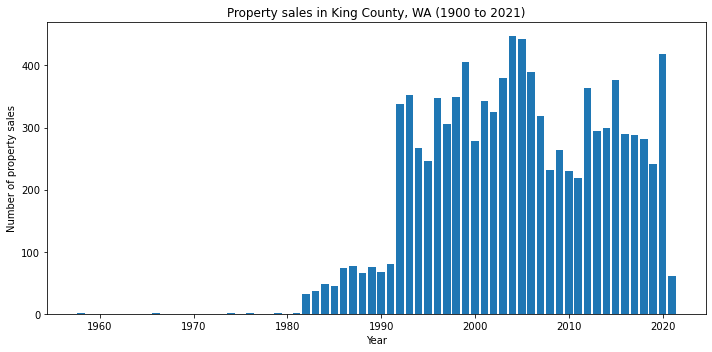

In [44]:
#create a figure and one plot
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

#place data in a bar chart
#Where the x-axis is each year and
#the y-axis is the no of sales per year
ax.bar(x=[sale[0] for sale in sale_year_count],
       height= [sale[1] for sale in sale_year_count]
       )
# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")
# display bar chart clearly
fig.tight_layout();

### Level Up: Counter
The collections package has a lot of useful tools for working with Python objects containing multiple elements. You can use the Counter class to easily count the number of values in a list.

For example, let's say that for all dictionaries in sales, we want to count how many property sales occured in each year.

In [45]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])
sale_year_count

Counter({2014: 299,
         2020: 419,
         1991: 81,
         2013: 295,
         2019: 241,
         1989: 75,
         2003: 380,
         2001: 342,
         1983: 36,
         1999: 406,
         2006: 389,
         1982: 32,
         1987: 77,
         2017: 288,
         2012: 364,
         1990: 68,
         2009: 264,
         2004: 447,
         1998: 349,
         2008: 231,
         2000: 279,
         2015: 376,
         2007: 319,
         2011: 218,
         1997: 306,
         2005: 442,
         1992: 338,
         2016: 290,
         2021: 61,
         1996: 347,
         1995: 246,
         2010: 230,
         1994: 267,
         1993: 353,
         2002: 325,
         2018: 281,
         1984: 48,
         1986: 74,
         1988: 66,
         1974: 1,
         1985: 44,
         1976: 1,
         1966: 1,
         1981: 2,
         1958: 1,
         1979: 1})

##### Let's sort these by year. Since the value in sale_year is an integer, we can use Python's built-in sorted function to transform the Counter object into a list of tuples - (year, count) which are sorted in ascending order by year.

In [46]:
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1958, 1),
 (1966, 1),
 (1974, 1),
 (1976, 1),
 (1979, 1),
 (1981, 2),
 (1982, 32),
 (1983, 36),
 (1984, 48),
 (1985, 44),
 (1986, 74),
 (1987, 77),
 (1988, 66),
 (1989, 75),
 (1990, 68),
 (1991, 81),
 (1992, 338),
 (1993, 353),
 (1994, 267),
 (1995, 246),
 (1996, 347),
 (1997, 306),
 (1998, 349),
 (1999, 406),
 (2000, 279),
 (2001, 342),
 (2002, 325),
 (2003, 380),
 (2004, 447),
 (2005, 442),
 (2006, 389),
 (2007, 319),
 (2008, 231),
 (2009, 264),
 (2010, 230),
 (2011, 218),
 (2012, 364),
 (2013, 295),
 (2014, 299),
 (2015, 376),
 (2016, 290),
 (2017, 288),
 (2018, 281),
 (2019, 241),
 (2020, 419),
 (2021, 61)]

#### Level Up: Using datetime
Python has a datetime package that is the standard tool for handling dates and times. datetime objects make it easy to do fun things like subtract dates to calculate how far apart they are.

In [47]:
from datetime import datetime

In [48]:
for sale in sales:
    #Transform Documentdate from string to datetime
    sale['clean_date'] = datetime.strptime(sale['DocumentDate'],'%m/%d/%Y')

    #Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale['clean_date'].year
    sale["sale_month"] = sale['clean_date'].month

In [49]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'month': 8,
 'year': 2014,
 'sale_year': 2014,
 'sale_month': 8,
 'clean_date': datetime.datetime(2014, 8, 21, 0, 0)}